In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
ins = pd.read_csv('insurance.csv'); ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
X = ins['age'].values.reshape(-1, 1)
y = ins['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
fit = LinearRegression().fit(X_train, y_train)

In [13]:
predicted = fit.predict(X_test); predicted

array([14794.08786402, 12586.24456412, 19455.09038601, 15039.40378623,
        8415.87388655, 12095.6127197 ,  8415.87388655, 19455.09038601,
       10623.71718644, 15775.35155286, 11114.34903086, 13812.82417517,
       10869.03310865, 15039.40378623, 18473.82669717, 15284.71970844,
       15775.35155286, 15284.71970844, 15039.40378623, 14303.4560196 ,
        9887.76941981, 14303.4560196 ,  8415.87388655,  9151.82165318,
       16020.66747507, 17001.93116391, 18473.82669717, 10378.40126423,
       15284.71970844,  8170.55796434, 13567.50825296, 17737.87893054,
        8906.50573097, 11114.34903086, 10133.08534202, 14794.08786402,
        8906.50573097, 14303.4560196 , 16511.29931949, 12586.24456412,
        8415.87388655,  9151.82165318, 17492.56300833, 18228.51077496,
       11850.29679749, 18228.51077496,  8906.50573097,  9887.76941981,
       14303.4560196 , 11359.66495307, 19209.7744638 ,  8170.55796434,
       13567.50825296,  8170.55796434, 17492.56300833, 16020.66747507,
      

In [20]:
spejimai = pd.Series(data=predicted, name='Spėjimai'); spejimai
orig_rez = pd.Series(data=y_test, name='YTest')


In [21]:
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1); res.head()

,YTest,Spėjimai
0,9095.06825,14794.087864
1,5272.17580,12586.244564
2,29330.98315,19455.090386
3,9301.89355,15039.403786
4,33750.29180,8415.873887


<AxesSubplot: >

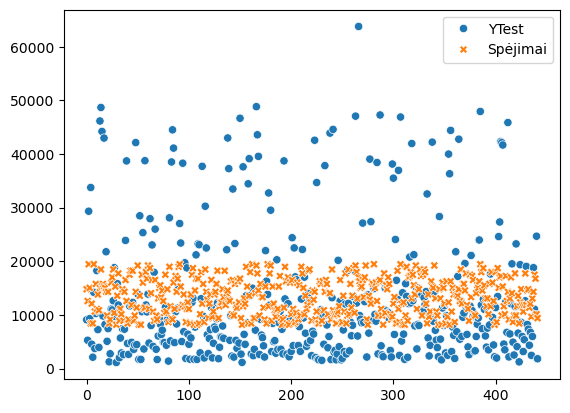

In [23]:
sns.scatterplot(data=res)

In [24]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
X = ins[['age', 'bmi', 'children']]
y = ins['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
fit = LinearRegression().fit(X_train, y_train)

In [28]:
pred = fit.predict(X_test)

In [29]:
spejimai = pd.Series(data=pred, name='Spėjimai')

In [30]:
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1); res.head(5)

,charges,Spėjimai
0,9095.06825,13579.609770
1,5272.17580,11744.155812
2,29330.98315,17097.387504
3,9301.89355,14656.906730
4,33750.29180,8492.898248


<AxesSubplot: >

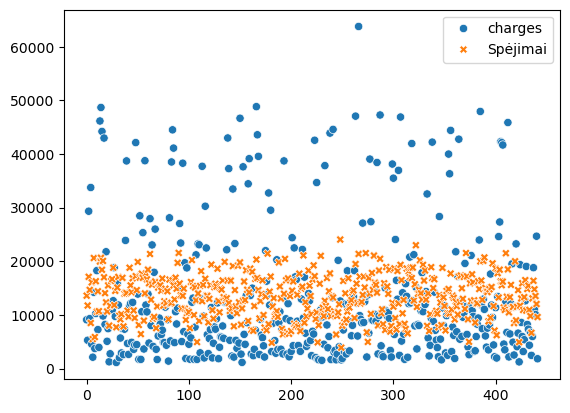

In [31]:
sns.scatterplot(data=res)

In [32]:
fit.score(X_test, y_test)*100.0

13.512776046931041

In [65]:
X.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [59]:
sex = pd.get_dummies(ins['sex'], dtype=int)
ins2 = pd.concat([ins, sex], axis=1); ins2
sm = pd.get_dummies(ins['smoker'], dtype=int)
ins3 = pd.concat([ins2, sm], axis=1); ins3
rg = pd.get_dummies(ins3['region'], dtype=int); rg
ins3 = pd.concat([ins3, rg], axis=1)

X = ins3.drop(columns=['sex','smoker','region', 'charges'])
y = ins3['charges']; X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

76.05492639270065

In [57]:
spejimai = pd.Series(data=pred, name='Spėjimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis=1); res.head(5)

,charges,Spėjimai
0,9095.06825,9016.367529
1,5272.17580,7019.976349
2,29330.98315,36870.834268
3,9301.89355,9518.537736
4,33750.29180,26974.030822


<AxesSubplot: >

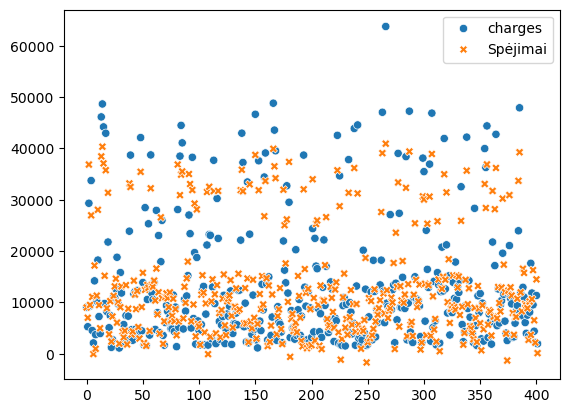

In [58]:
sns.scatterplot(data=res)

In [60]:
X.columns

Index(['age', 'bmi', 'children', 'female', 'male', 'no', 'yes', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [67]:
fit.predict(np.reshape([32,22,1,1,0,1,0,0,1,0,0], (1,-1)))

array([3612.25866984])

In [68]:
mpg = sns.load_dataset('mpg'); mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
